<a href="https://colab.research.google.com/github/BreakoutMentors/Data-Science-and-Machine-Learning/blob/adam-medical-cnn/machine_learning/lesson%204%20-%20Convolutional%20Neural%20Networks/Intro_to_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks
![CNN](https://miro.medium.com/max/2510/1*vkQ0hXDaQv57sALXAJquxA.jpeg)


## What are Convolutional Neural Networks(CNNs)?
A Convolutional Neural Network is a type of nerual network and Deep Learning algorithm that has been very popular in the last 10 years for its great involvement in improving Computer Vision (CV). They are excellent at classifying objects in an images that are being implemented in many areas, especially Medicine!

## How are CNNs contributing to Medicine?
Convolutional Neural Networks have been being studied as tools to help doctors give treatments to patients by providing higher classification accuracies than a team of specialists at times. Having computers diagnosing medical conditions such as cancer and diseases give doctors a chance to provide immediate treatment that can cut a lot of time, which can be life saving at times. CNNs are being studied and improved at the best medical universities around the world, for the hope of having CNNs being applied for the diagnosis process especially in areas where medical specialists are rare.

## What is different between a CNN and a normal Neural Network?
The main difference between them two is the *Feature Learning* section from the CNN image above. In that section, we see that an image is being inserted at the input and it goes through a process where information is being picked from the image then summerized through **Convolutional Layers**. The information that is being picked are features in the image, such as the lights, tire, and shape of the car in the image. The reason it is called *Feature Learning* is because the way it looks for features in the images is automized as well, therefore the weights used in the convolutional layers are being trained and improved overtime.

You can also see that it gets smaller overtime, which is good since we are wanting to gather the most important features while decreasing the memory. This action of decreasing memory while keeping data is called *encoding*, so we are encoding the data in the images to then use for classification purposes.

The *Classification* section of the CNN is just a normal Neural Network where the encoded features are learned to then give predictions at the end. The encoded features are flattened because the flattened features will be the input of the input layer. So you can see that a CNN is just a special type of Neural Network where it learns to get the most important information from the images.

In [1]:
from google.colab import files
from IPython.utils import io
import os
files.upload()
os.system("mkdir -p ~/.kaggle")
os.system("cp kaggle.json ~/.kaggle/")
os.system("chmod 600 ~/.kaggle/kaggle.json")
!kaggle datasets download -d preetviradiya/covid19-radiography-dataset
with io.capture_output() as captured:
  !unzip covid19-radiography-dataset.zip && rm covid19-radiography-dataset.zip

Saving kaggle.json to kaggle.json
 99% 737M/747M [00:13<00:00, 60.2MB/s]
100% 747M/747M [00:13<00:00, 56.5MB/s]


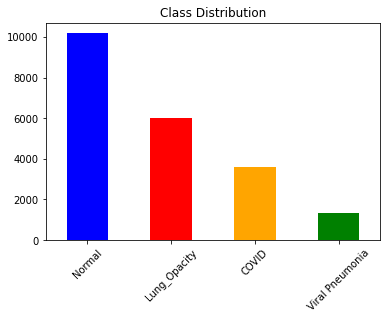

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import PIL

dataframe = pd.read_csv("/content/metadata.csv")
dataframe['label'].value_counts().plot.bar(color=['b', 'r', 'orange', 'g'])
plt.xticks(rotation=45)
plt.title('Class Distribution')
plt.show()

In [3]:
import torch
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

root = "/content/COVID-19_Radiography_Dataset/COVID-19_Radiography_Dataset"

means = (0.485, 0.456, 0.406)
stds = (0.229, 0.224, 0.225)

# Add more transforms tomorrow
transforms = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(means, stds), # Means and STDs of ImageNet
])

# Using ImageFolder to read in the images with their labeled folders
dataset = ImageFolder(root, transform=transforms)

# Calculating the amount of images to split the dataset
trainToTestRatio = 0.8
trainSize = int(trainToTestRatio * len(dataset))
testSize = len(dataset) - trainSize

# Calculating the amount to split the training set into validation set
valSize = int(trainSize * 0.1) # Taking 10% of training data
trainSize = trainSize - valSize # Updating the amount of training data

# Splitting Data
training_data, val_data, testing_data = torch.utils.data.random_split(dataset, lengths=[trainSize, valSize, testSize])

# Loading Data
batch_size = 16

train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(testing_data, batch_size=batch_size)
val_dataloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)

# Using dictionaries to easily access all the dataloaders and datasets
loaders = {'train':train_dataloader, 'valid':val_dataloader, 'test':test_dataloader}
datasets = {'train':training_data, 'valid':val_data, 'test':testing_data}

print("These are the classes:", dataset.class_to_idx)

These are the classes: {'COVID': 0, 'Lung_Opacity': 1, 'Normal': 2, 'Viral Pneumonia': 3}


Batch Image Dimensions: torch.Size([16, 3, 224, 224])
Batch Label Dimensions: torch.Size([16])


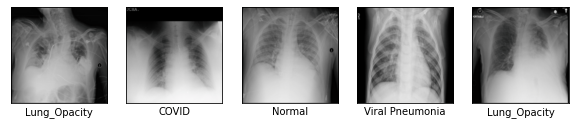

In [4]:
import torchvision.transforms.functional as F

# Function to reverse normalization of the images
def unNormalizeTensor(tensor, means, stds):
  for channel, mean, std in zip(tensor, means, stds):
    channel.mul_(std).add_(mean)
  return tensor

# Printing the dimensions of each batch
images, labels = next(iter(train_dataloader))
print("Batch Image Dimensions:", images.size())
print("Batch Label Dimensions:", labels.size())

# Printing images and their labels
idx_to_class = {value:key for key,value in dataset.class_to_idx.items()}
plt.figure(figsize=(10, 9))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image = F.to_pil_image(unNormalizeTensor(images[i], means, stds))
  plt.imshow(image)
  plt.xlabel(idx_to_class[labels[i].item()])

In [5]:
import torch.nn as nn

class CNN_Model(nn.Module):
  
  # Constructing model
  def __init__(self):
    super(CNN_Model, self).__init__()

    # Defining Batch Normalization
    self.norm = nn.BatchNorm2d(num_features=3)

    # Defining Convolutional Layers
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, padding=1, stride=1) # Output Dimensions = (12, 224, 224)
    self.conv2 = nn.Conv2d(in_channels=12, out_channels=16, kernel_size=3, padding=1, stride=1)
    self.conv3 = nn.Conv2d(in_channels=16, out_channels=20, kernel_size=3, padding=1, stride=1)
    
    # Defining MaxPool Layer
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    # Defining Fully Connected Layers
    self.fc1 = nn.Linear(self.conv3.out_channels * 28 * 28, 3920) # Input Dimensions before Flattening = (20, 28, 28)
    self.fc2 = nn.Linear(3920, 980)
    self.fc3 = nn.Linear(980, 245)
    self.fc4 = nn.Linear(245, 62)
    self.fc5 = nn.Linear(62, 4) # Output Layer with 4 ending nodes for the four classes

    # Activation Function to use throughout
    self.relu = nn.ReLU()

    # Dropout to prevent overfitting
    self.dropout = nn.Dropout(p=0.5)
  
  def forward(self, input):
    
    # Batch Normalization for faster training
    x = self.norm(input)

    # First Convolutional Layer 
    x = self.relu(self.conv1(x)) # Output Shape = (12, 224, 224)
    x = self.maxpool(x) # Output Shape = (12, 112, 112)

    # Second Convolutional Layer
    x = self.relu(self.conv2(x)) # Output Shape = (16, 112, 112)
    x = self.maxpool(x) # Output Shape = (16, 56, 56)

    # Third Convolutional Lay
    x = self.relu(self.conv3(x)) # Output Shape = (20, 56, 56)
    x = self.maxpool(x) # Output Shape = (20, 28, 28)

    # Flattening Tensor
    x = x.view(-1, 20*28*28)

    # Fully Connected Layers
    x = self.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.relu(self.fc2(x))
    x = self.dropout(x)
    x = self.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.relu(self.fc4(x))
    x = self.fc5(x)

    return x

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Intializing model and having it use a GPU if available
model = CNN_Model()
model.to(device)

# Defining Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Defining Loss Function; CE Loss because we have multiple categories
criterion = nn.CrossEntropyLoss()

In [9]:
def train(n_epochs, loaders, datasets, model, optimizer, criterion, device, save_path):
    """returns trained model"""
    # Initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    losses = []
    valid_losses = []
    for epoch in range(1, n_epochs+1):
      # Initialize variables to monitor training and validation loss
      train_loss = 0.0
      valid_loss = 0.0
        
      ###################
      # train the model #
      ###################
      model.train()
      for images, labels in loaders['train']:
        # Move to GPU if available
        images, labels = images.to(device), labels.to(device)
            
        # Zero the parameter gradients
        optimizer.zero_grad()
            
        # Calculating the output
        output = model(images)
            
        # Caluculating the Loss
        loss = criterion(output, labels)
            
        # Calculating the gradients
        loss.backward()
            
        # Performing Gradient Descent Step
        optimizer.step()
            
        # Saving the training loss
        train_loss += loss.data
            
            
      ######################    
      # validate the model #
      ######################
      model.eval()
      
      for images, labels in loaders['valid']:
        # Move to GPU if available
        images, labels = images.to(device), labels.to(device)
            
        # Getting the output
        output = model(images)
            
        # Calculating the Loss
        loss = criterion(output, labels)
            
        # Saving the validation loss
        valid_loss += loss.data

      # Averaging the losses
      train_loss /= len(datasets['train'])
      valid_loss /= len(datasets['valid'])

      # Appending the losses to plot afterwards
      losses.append(train_loss.item())
      valid_losses.append(valid_loss.item())
            
      # Print training/validation statistics 
      print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
      # Save the model if validation loss has decreased
      if valid_loss < valid_loss_min:
        print('Saving Model')
        torch.save(model.state_dict(), save_path)
        valid_loss_min = valid_loss
            
  # return trained model, and saved losses
  return model, np.array(losses), np.array(valid_losses)

num_epochs=10

model, losses, valid_losses = train(10, loaders, datasets, model, optimizer, criterion, device, 'saved_model.pt')

Epoch: 1 	Training Loss: 0.076627 	Validation Loss: 0.071867
Saving Model
Epoch: 2 	Training Loss: 0.065120 	Validation Loss: 0.054962
Saving Model
Epoch: 3 	Training Loss: 0.052224 	Validation Loss: 0.044573
Saving Model
Epoch: 4 	Training Loss: 0.047655 	Validation Loss: 0.044604
Epoch: 5 	Training Loss: 0.044380 	Validation Loss: 0.037244
Saving Model
Epoch: 6 	Training Loss: 0.041591 	Validation Loss: 0.035071
Saving Model
Epoch: 7 	Training Loss: 0.039322 	Validation Loss: 0.034474
Saving Model
Epoch: 8 	Training Loss: 0.036870 	Validation Loss: 0.033573
Saving Model
Epoch: 9 	Training Loss: 0.034666 	Validation Loss: 0.029685
Saving Model
Epoch: 10 	Training Loss: 0.032096 	Validation Loss: 0.028514
Saving Model


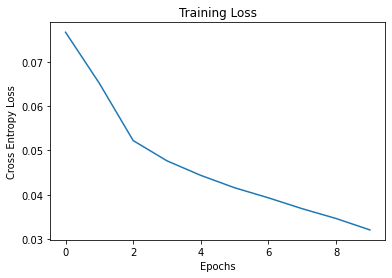

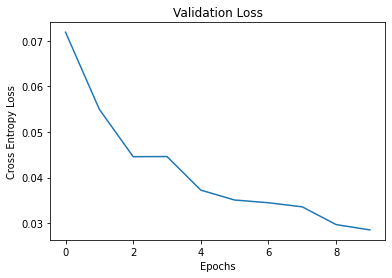

In [10]:
def plot_losses(losses, title):
  plt.plot(losses)
  plt.xlabel("Epochs")
  plt.ylabel("Cross Entropy Loss")
  plt.title(title)
  plt.show()

plot_losses(losses, title='Training Loss')
plot_losses(valid_losses, title='Validation Loss')

In [11]:
def getPredsFromLogits(logits):
  # Using softmax to get an array that sums to 1, and then getting the index with the highest value
  return torch.nn.functional.softmax(logits, dim=1).argmax(dim=1)

def test(loaders, model, criterion, device):

  # monitor test loss and accuracy
  test_loss = 0.0
  correct = 0
  total = 0

  model.eval()
  for images, labels in loaders['test']:
    # move to GPU if available
    images, labels = images.to(device), labels.to(device)
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(images)
    # calculate the loss
    loss = criterion(output, labels)
    # update average test loss 
    test_loss += loss.data
    # convert output probabilities to predicted class
    pred = getPredsFromLogits(output)
    # compare predictions to true label
    correct += pred.eq(labels).sum().item()
    total += pred.shape[0]
  
  test_loss /= total
            
  print('Test Loss: {:.6f}\n'.format(test_loss))

  print('\nTest Accuracy: %2d%% (%2d/%2d)' % (100. * correct / total, correct, total))

test(loaders, model, criterion, device)

Test Loss: 0.032569


Test Accuracy: 79% (3363/4233)


## How to load a saved model

It is useful to save the model then reuse it later to prevent having to retrain your model which can take a very long time. This is really important when you want to work on your own projects!

In [14]:
# First create a new instance of the model class
saved_model = CNN_Model()

# Second, load state dict in the file that was saved then it should work as normal!
saved_model.load_state_dict(torch.load('saved_model.pt'))

# It will be downloaded to your computer as an example for you to save yours later
files.download('saved_model.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>